Importing data packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost as xgb
%matplotlib inline
import warnings
import xgboost
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [2]:
dataset = pd.read_csv('train.csv')
dataset_res = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')
y = dataset.iloc[:, -1].values
y_res = dataset_res.iloc[:, -1].values

In [3]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
dataset_res.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [5]:
zero_check_train = dataset.isnull().sum()
zero_check_train = zero_check_train[zero_check_train!=0]
zero_check_train = zero_check_train.sort_values(ascending=True)
zero_check_train

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

Corrmat is used for the Data analysis, it shows the relationships between the variables and the strength or the values in regards to one another. This is important as linear regression requires there to be a correlation between the key values and their members.

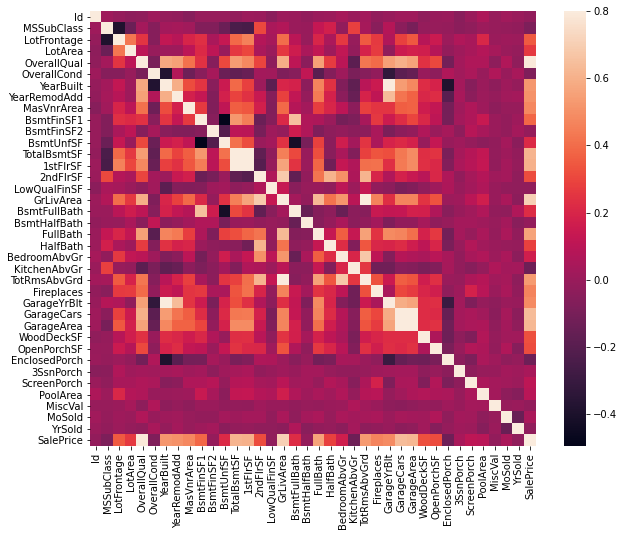

In [6]:
corrmat = dataset.corr()
f, ax1 = plt.subplots(figsize=(10,8))
ax1=sns.heatmap(corrmat,vmax = 0.8);

This shows the correlations between the variables, 1.0 being 100% and 0.00 is 0%. This is why Sales price is 1 as it is going to have a direct correlation as its the same item.

In [7]:
corr_sale = dataset.corr().SalePrice
corr_field = corr_sale.sort_values(ascending = False).head(11)
corr_field

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Corr_field drops YearRemodAdd GarageCars 1stFlrSF as they do not have an extremely strong correlation and as the prediction models require the highest weighted or similar data, I've dropped the values as it would negatively affect the predicted results

In [8]:
corr_field = corr_field.drop(['YearRemodAdd','GarageCars','1stFlrSF',]).index

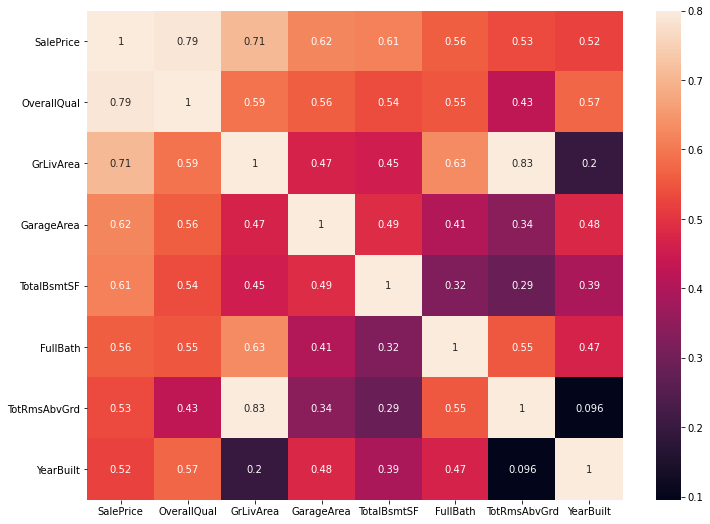

In [9]:
corrmat = dataset[corr_field].corr()
f, ax1 = plt.subplots(figsize=(12,9))

ax1=sns.heatmap(corrmat,vmax = 0.8,annot = True);

In [10]:
corr_field = corr_field.drop('SalePrice');

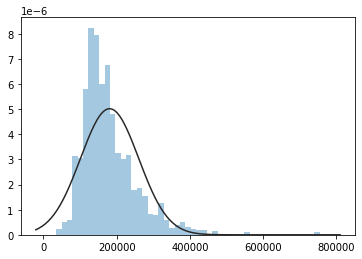

In [11]:
sns.distplot(y,fit = norm, kde=False);

This shows the skew of the data within the correlation graph, the notches on the bottom are the individual data points and as the range increased above 400000 the frequency of the data decreases this is due to the dataset being heavy on values between 90000 and 400000.

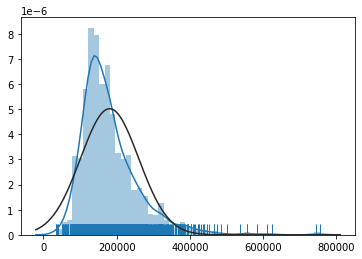

In [12]:
sns.distplot(y,fit = norm,rug=True);

In [13]:
print("Skew: %f" % dataset['SalePrice'].skew(),"Kurt: %f" % dataset['SalePrice'].kurt())

Skew: 1.882876 Kurt: 6.536282


This Shows the distribution vairance in sales prices along with a line of best fit.

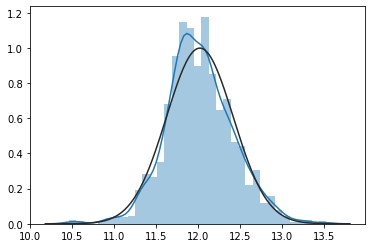

In [14]:
y_log = np.log(y)
sns.distplot(y_log,fit = norm);

This is a list of diagrams of each of the dataset and how they impact with the sales price, ive used this to spot outliers and to visualise the variation in the data points and how they weigh against the sales price.

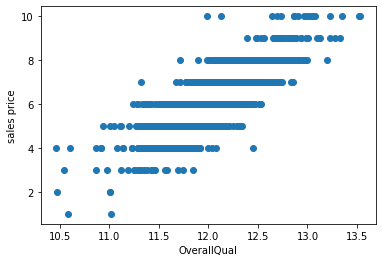

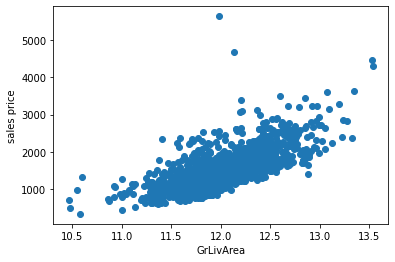

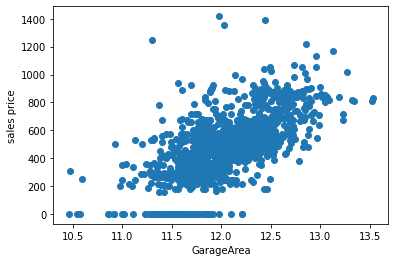

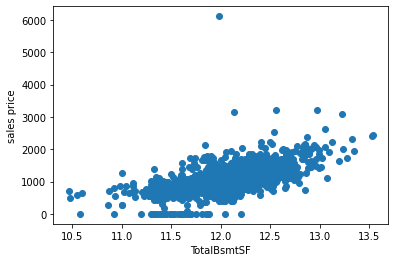

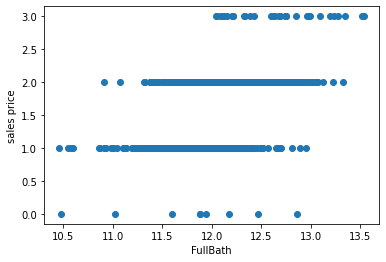

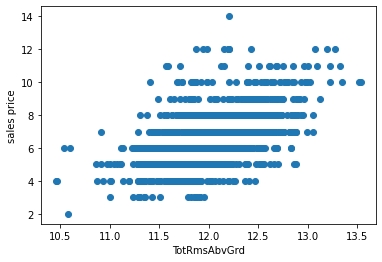

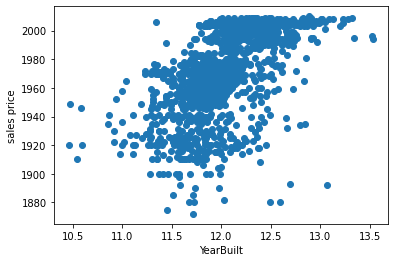

In [15]:
for i in corr_field:
    plt.scatter(y_log,dataset[i])
    plt.xlabel(i)
    plt.ylabel("sales price")
    plt.show()

In [16]:
X = dataset[corr_field]
X = X.fillna(X.mean())
test_values = dataset_res[corr_field]
test_values = test_values.fillna(test_values.mean())

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import StackingRegressor
from vecstack import stacking
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42)
KR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
Ela= ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
XGB = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
clf = Lasso()


ereg = VotingRegressor(estimators=[('gb', XGB), ('KR', KR), ('EN', Ela),('clf', clf)])
ereg = ereg.fit(X_train,y_train)

clf.fit(X_train,y_train)
Ela.fit(X_train,y_train)
XGB.fit(X_train,y_train)
KR.fit(X_train,y_train)

y_pred5 = ereg.predict(X_test)
y_train_pred5 = ereg.predict(X_train)

y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

y_pred2 = Ela.predict(X_test)
y_train_pred2 = Ela.predict(X_train)

y_pred3 = XGB.predict(X_test)
y_train_pred3 = XGB.predict(X_train)

y_pred4 = KR.predict(X_test)
y_train_pred4 = KR.predict(X_train)


/home/runner/venv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.54787e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,
/home/runner/venv/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.54787e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,


The final prediction model is a Stacked Regressor taking the best esstimates of each of the regressors and combining the accuracy of the preictive models into one more accurate model.

In [18]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
estimators = [('ridge', RidgeCV()),('lasso', LassoCV(random_state=42)),('svr', SVR(C=1, gamma=1e-6))]
reg = StackingRegressor(estimators=estimators,final_estimator=GradientBoostingRegressor(random_state=42))
reg.fit(X_train, y_train)

y_pred6 = reg.predict(X_test)
y_train_pred6 = reg.predict(X_train)

This is a output of the accucy of the predictions

In [19]:
from sklearn.metrics import r2_score
print("Lasso Train acc: " , r2_score(y_train, y_train_pred))
print("Test acc: ", r2_score(y_test, y_pred))

print("ElasticNet Train acc: " , r2_score(y_train, y_train_pred2))
print("Test acc: ", r2_score(y_test, y_pred2))

print("XGBoost Train acc: " , r2_score(y_train, y_train_pred3))
print("Test acc: ", r2_score(y_test, y_pred3))

print("Kernel Ridge Train acc: " , r2_score(y_train, y_train_pred4))
print("Kernel Ridge Test acc: ", r2_score(y_test, y_pred4))

print("Combined Voting Regretion Train acc: " , r2_score(y_train, y_train_pred5))
print("Combined Voting Regretion Test acc: ", r2_score(y_test, y_pred5))

print("stacked Regretion Train acc: " , r2_score(y_train, y_train_pred6))
print("Stacked Regretion Test acc: ", r2_score(y_test, y_pred6))


Lasso Train acc:  0.7535860544992492
Test acc:  0.7973826318542716
ElasticNet Train acc:  0.7535860560302978
Test acc:  0.7973816653216106
XGBoost Train acc:  0.9487956383469189
Test acc:  0.8454048532234505
Kernel Ridge Train acc:  0.8453505489429092
Kernel Ridge Test acc:  0.8641929538979525
Combined Voting Regretion Train acc:  0.8610611650800608
Combined Voting Regretion Test acc:  0.8464692127283874
stacked Regretion Train acc:  0.8118674914560843
Stacked Regretion Test acc:  0.8714529530784929


In [20]:
#from sklearn.metrics import mean_squared_error
#print("Train acc: " , clf.score(X_train, y_train))
#print("Test acc: ", clf.score(X_test, y_test))


In [21]:
final_labels = clf.predict(test_values)
final_labels2 =Ela.predict(test_values)
final_labels3 =XGB.predict(test_values)
final_labels4 =KR.predict(test_values)
final_labels5 = reg.predict(test_values)

final = [final_labels,final_labels2,final_labels3,final_labels4,final_labels5]

In [1]:

def graphs(self,data):
    self.data=data
    plt.plot(self.data['Id'], self.data['SalesPrice'])


    # Joint Plot
    jp = sns.jointplot(x='Id', y='SalesPrice', data=datas,
                       kind='reg', space=0, size=5, ratio=4)

In [38]:
graphs(final_labels)

NameError: name 'this' is not defined

In [23]:
LR_fin_result

,Id,SalePrice
0,1461,131702.942540
1,1462,163486.492451
2,1463,167972.121285
3,1464,188591.055062
4,1465,220398.955640
...,...,...
1454,2915,81185.272435
1455,2916,95840.280894
1456,2917,149117.079333
1457,2918,113904.499534
